<center><h2>FIZ 437E</h2></center>
<center><h3>Statistical Learning from Data: Applications in Physics</h3></center>
<center><h4>Homework 4 Solutions</h4></center>

Gökay Akçay **090200147**

Burak Berk Cihan **090200161**

Ege Tan Tüzüner **090200131**

Umut Kaya **090190149**

### Homework 4

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.datasets import load_breast_cancer
from scipy.stats import norm
from naive_bayes import GaussianNB

#### Importing Data

In [2]:
cancer = load_breast_cancer()
X,y = cancer.data,cancer.target
y = y.reshape(-1,1)

In [3]:
np.concatenate((X, y),axis = 1)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [4]:
feature_names = list(cancer.feature_names)

In [5]:
df_cancer = pd.DataFrame(np.concatenate((X, y),axis = 1),columns = feature_names + ['iscancer'],dtype = 'float')

### EDA's and Plots

In [6]:
corr = df_cancer.corr()

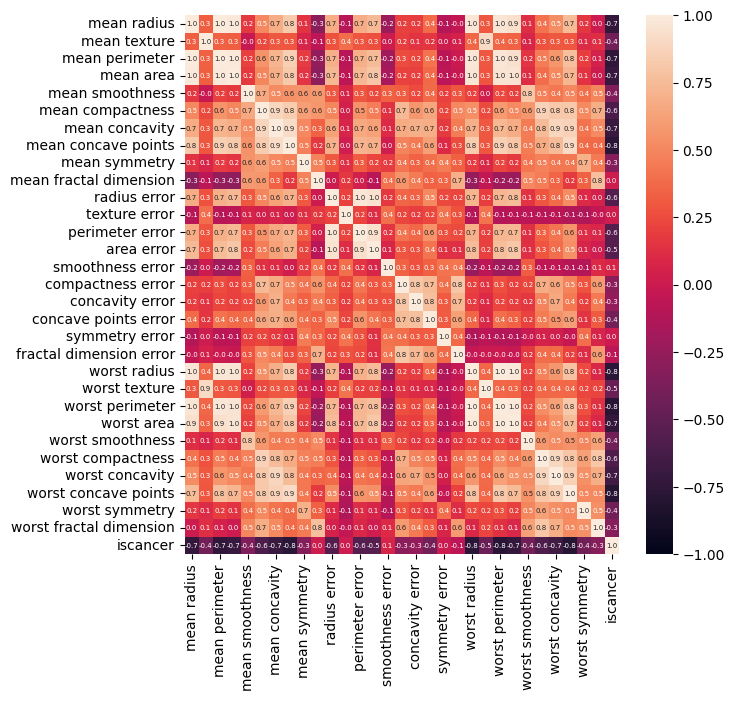

In [7]:
fig,axs = plt.subplots(figsize = (7,7))
sns.heatmap(corr,annot=True, fmt=".1f",vmin = -1,vmax =1,annot_kws={"size": 5})
plt.show()

Since Gaussian Naive Bayes algorithm based on a method which differs the categorical labels from their unlikeness by using standard deviation and mean, it is needed to use features with seperable gaussian curves

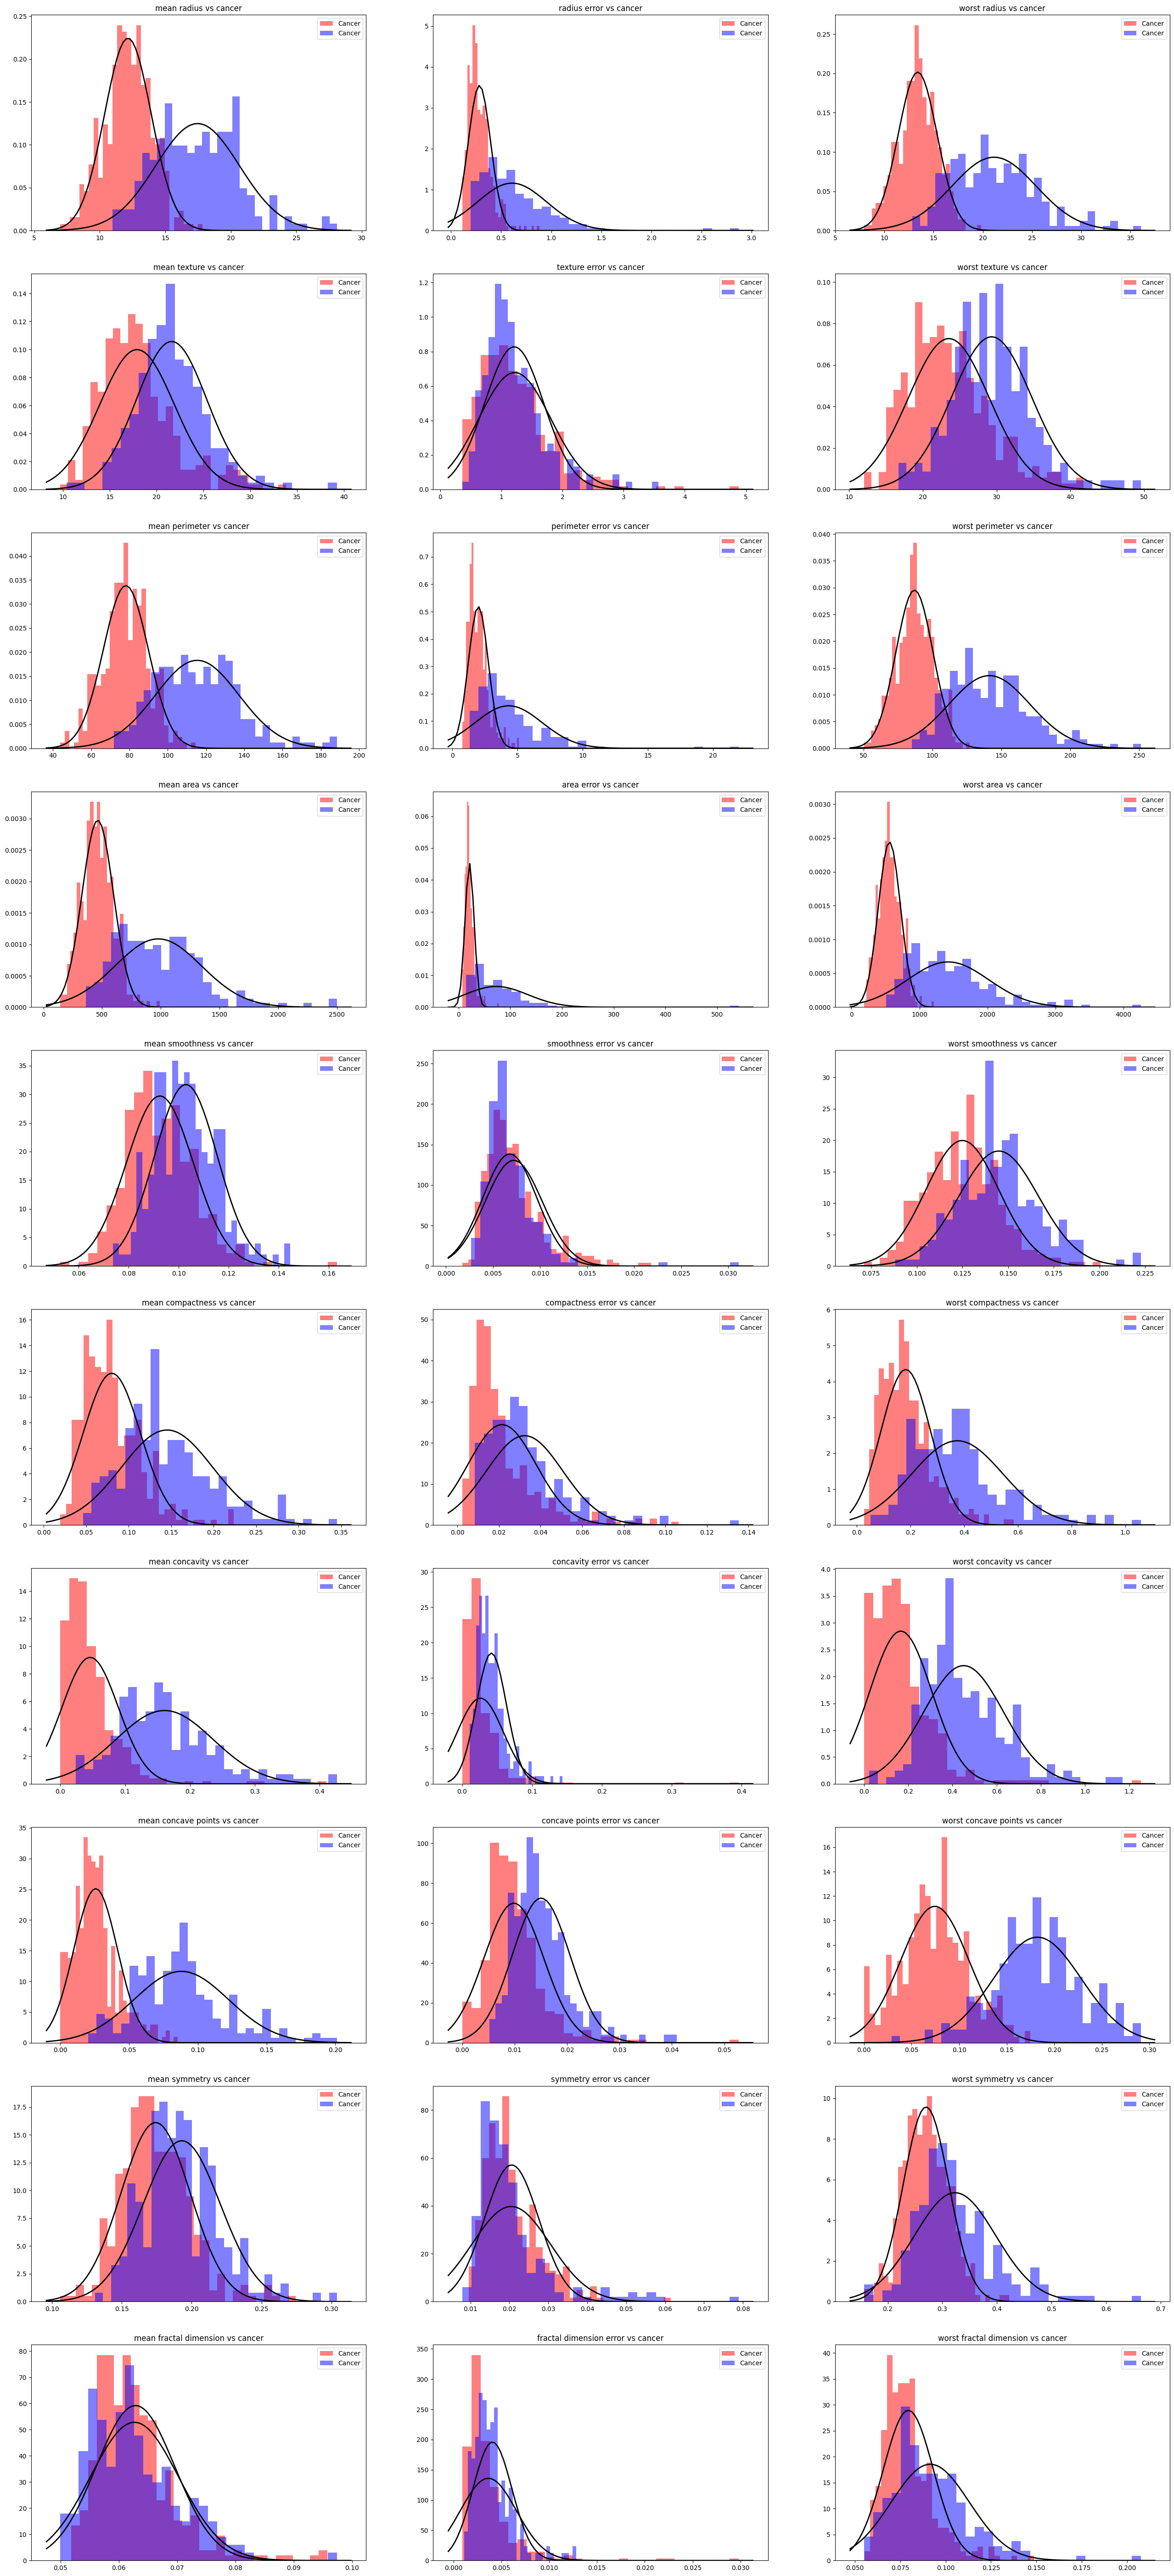

In [8]:
row_len = 10
col_len = 3
row_idx = 0
col_idx = 0

fig,axs = plt.subplots(ncols = col_len , nrows = row_len,figsize = (32,72))

cancer_data = df_cancer[df_cancer['iscancer'] == 1]
not_cancer_data = df_cancer[df_cancer['iscancer'] == 0]

for target_column in feature_names:
   
    mu_zero, std_zero = norm.fit(not_cancer_data[target_column])
    mu_one, std_one = norm.fit(cancer_data[target_column])
    
    axs[row_idx,col_idx].hist(cancer_data[target_column], bins=30, density=True, alpha=0.5, color='r', label='Cancer')
    axs[row_idx,col_idx].set_title(f'{target_column} vs cancer')
    axs[row_idx,col_idx].legend()
    
    axs[row_idx,col_idx].hist(not_cancer_data[target_column], bins=30, density=True, alpha=0.5, color='b', label='Cancer')
    axs[row_idx,col_idx].set_title(f'{target_column} vs cancer')
    axs[row_idx,col_idx].legend()
    
    xmin, xmax = axs[row_idx,col_idx].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p_0 = norm.pdf(x, mu_zero, std_zero)
    p_1 = norm.pdf(x, mu_one, std_one)
    axs[row_idx,col_idx].plot(x, p_0, 'k', linewidth=2)
    axs[row_idx,col_idx].plot(x, p_1, 'k', linewidth=2)
    row_idx += 1
    if(row_idx >= row_len):
        row_idx = 0 
        col_idx +=1
        if(col_idx >= col_len):
            break
plt.show()

Most distinguishable features are selected

### Feature Engineering & Predictions

In [9]:
selected_features = ['mean perimeter','worst radius','mean compactness','mean concave points','mean concavity','worst concavity','worst concave points']

In [10]:
custom_labels = {0: 'not Cancer', 1: 'Cancer'}

#### Before Feature Enginnering

 No normalization and no feature engineering used for comparising models in the next section

In [11]:
X = df_cancer[feature_names]
y = y.reshape(-1,1) 

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y,shuffle = True,random_state = 4362,train_size = 0.66)

In [13]:
clf = GaussianNB()

In [14]:
clf.fit(X_train,y_train)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.7938144329896907

In [17]:
f1_score(y_test,y_pred)

0.8260869565217391

In [18]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot: >

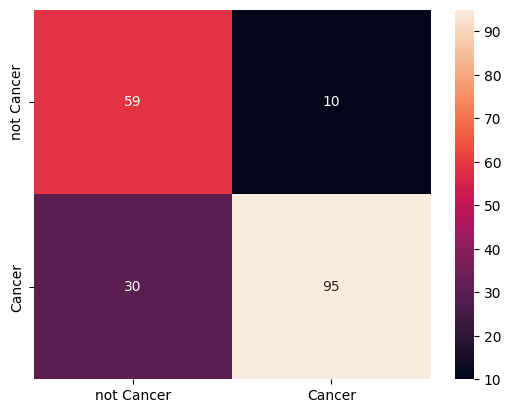

In [19]:
sns.heatmap(cm,annot = True,fmt ="0.0f", xticklabels=[custom_labels[i] for i in range(cm.shape[1])],
            yticklabels=[custom_labels[i] for i in range(cm.shape[0])])

#### After Feature Enginnering

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [21]:
X = df_cancer[selected_features]
X_normalized =(X-X.min())/(X.max()-X.min())
y = y.reshape(-1,1)

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X_normalized ,y,shuffle = True,random_state = 4362,train_size = 0.66)

In [23]:
clf = GaussianNB()

In [24]:
clf.fit(X_train,y_train)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
accuracy_score(y_test,y_pred)

0.9072164948453608

In [28]:
f1_score(y_test,y_pred)

0.9256198347107438

In [29]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot: >

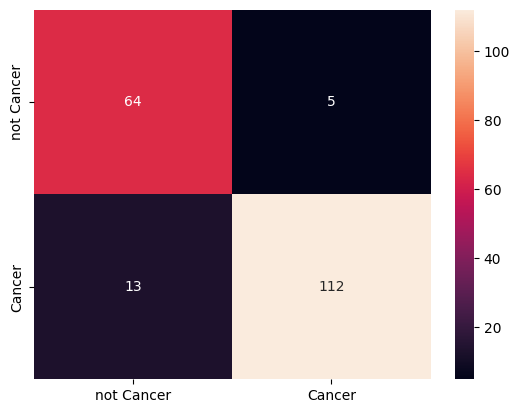

In [30]:
sns.heatmap(cm,annot = True,fmt ="0.0f", xticklabels=[custom_labels[i] for i in range(cm.shape[1])],
            yticklabels=[custom_labels[i] for i in range(cm.shape[0])])

Summary: Without normalization of features and using all features, accuracy was 0.79 and f1_score was 0.82. After normalization and feature selections, model scores have been improved to 0.90 for accuracy score and 0.925 for f1_score